# Resolvendo um problema de regressão

### Concrete Compressive Strength Data Set - Retirado de https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

### 1 - Carregar uma base de dados de regressão

In [1]:
import pandas as pd
df = pd.read_excel('Concrete_Data.xlsx')

In [19]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [2]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [3]:
X.shape, y.shape

((1030, 8), (1030,))

0


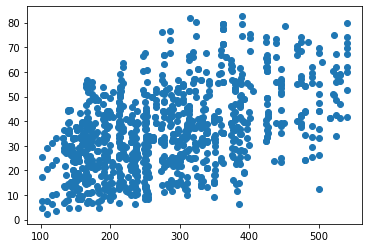

1


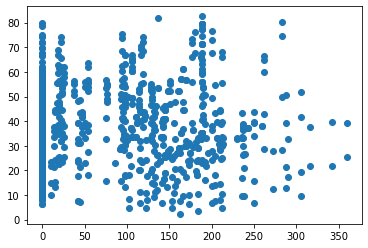

2


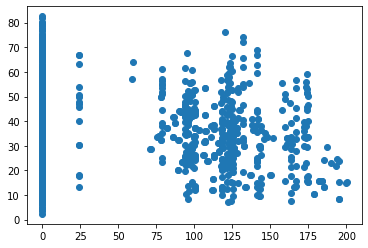

3


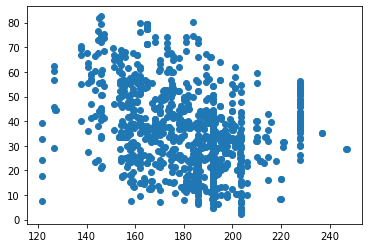

4


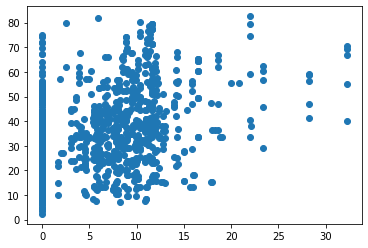

5


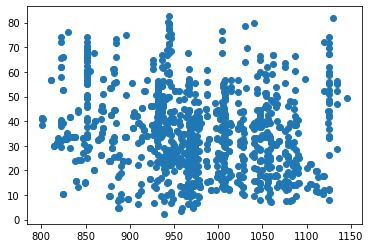

6


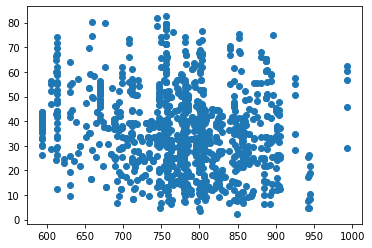

7


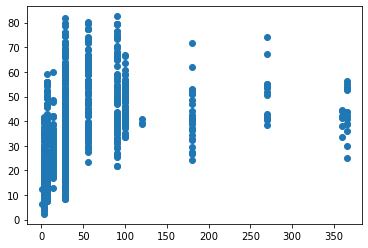

In [4]:
import matplotlib.pylab as plt 
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

### 2 - Treinar um modelo da classe LinearRegression do scikit-learn com a base

In [5]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

### 3 - Calcular o MSE para todos os exemplos da base (ressubstituição)

In [16]:
from sklearn.metrics import mean_squared_error
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

107.21180273450534
-23.16375581107919 [ 0.11978526  0.10384725  0.08794308 -0.1502979   0.29068694  0.01803018
  0.02015446  0.11422562]


### 4 - Plotar em um gráfico 2D o MSE em função do atributo intersept_ da classe linear regression

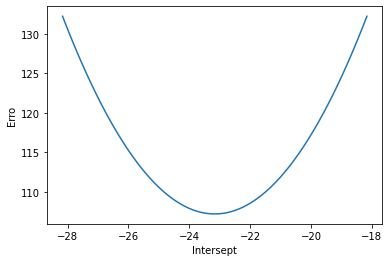

In [18]:
import numpy as np
import matplotlib.pyplot as plt

delta = 5
w = np.linspace(modelo.intercept_ - delta, modelo.intercept_ + delta, 100)

def z_function(w):    
    Erro = np.empty(w.shape)
    for j in range(Erro.shape[0]):
        modelo.intercept_ = w[j]
        ypred = modelo.predict(X)
        mse = mean_squared_error(y, ypred)
        Erro[j] = mse
    return Erro 

Erro = z_function(w)
plt.ylabel('Erro')
plt.xlabel('Intersept')
plt.plot(w, Erro)